In [ ]:
'''
Music Genre Classification Using Machine Learning
Ian M Fraser
CSc 59929 Spring 2019

'''

In [ ]:
'''
First step is to read each file in the dataset and extract the features using the
librosa library. Once the features are extracted, the mean and standard deviation 
is calculated for each feature and the values are stored in dataframe which gets
saved as CSV for later use with the classification models.
'''

In [1]:
import os
import numpy as np
import pandas as pd
import librosa

In [2]:
#find path to audio files
file_path = '/Users/IMF1/Desktop/Capstone-MusicGenreClassification/genres2'

#store a list of genre names - might not need this
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

#read filenames and genre from csv - set the filename as index
df = pd.read_csv('genres.csv', names=['filename', 'genre'])
df.set_index('filename', inplace=True)
df = df.sort_index()

feature_names= ['mean_zcr', 'std_zcr', 'mean_rmse', 'std_rmse', 'bpm', 'mean_mfcc0', 'std_mfcc0', 
    'mean_mfcc1', 'std_mfcc1', 'mean_mfcc2', 'std_mfcc2', 'mean_mfcc3', 'std_mfcc3', 'mean_mfcc4', 'std_mfcc4', 
    'mean_mfcc5', 'std_mfcc5', 'mean_mfcc6', 'std_mfcc6', 'mean_mfcc7', 'std_mfcc7', 'mean_mfcc8', 'std_mfcc8', 
    'mean_mfcc9', 'std_mfcc9', 'mean_mfcc10', 'std_mfcc10', 'mean_mfcc11', 'std_mfcc11', 'mean_mfcc12', 'mean_mfcc12', 
    'mean_chroma', 'std_chroma', 'mean_centroid', 'std_centroid', 'mean_bandwidth', 'std_bandwidth', 'mean_contrast', 
    'std_contrast', 'mean_rolloff', 'std_rolloff']

features_df = pd.DataFrame(columns = feature_names)

In [ ]:
'''
In order to perform any kind of ML model on our music, we must find meaningful features in each track.
To do this I used the librosa library's spectral and rhythmic feature methods. The follow cell takes each 
audio file in my dataset, converst it to a time series array, and then performs the specificied feature extraction.
Once all the feature information is gathered, I find the mean and standard deviation of each feature and store them
into a dictionary to store later in a pandas data frame.

'''

In [ ]:
rows = []
for file in df.index:
    temp = {}
    y, sr = librosa.load('{}/{}'.format(file_path, file))
    zcr = librosa.feature.zero_crossing_rate(y)
    rmse = librosa.feature.rmse(y)
    onset_env = librosa.onset.onset_strength(y, sr=sr)
    bpm = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, aggregate=None)
    mfcc = librosa.feature.mfcc(y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_cqt(y, sr=sr)
    centroid = librosa.feature.spectral_centroid(y, sr=sr)
    bandwidth = librosa.feature.spectral_bandwidth(y, sr=sr)
    contrast = librosa.feature.spectral_contrast(y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y, sr=sr)
    temp.update({'filename': file, 'mean_zcr': np.mean(zcr), 'std_zcr': np.std(zcr),
                       'mean_rmse': np.mean(rmse), 'std_rmse': np.std(rmse), 'bpm': np.mean(bpm), 
                       'mean_mfcc0': np.mean(mfcc[0, :]), 'std_mfcc0': np.std(mfcc[0, :]), 'mean_mfcc1': np.mean(mfcc[1, :]),
                       'std_mfcc1': np.std(mfcc[1, :]), 'mean_mfcc2': np.mean(mfcc[2, :]), 'std_mfcc2': np.std(mfcc[2, :]), 
                       'mean_mfcc3': np.mean(mfcc[3, :]), 'std_mfcc3': np.std(mfcc[3, :]), 'mean_mfcc4': np.mean(mfcc[4, :]),
                       'std_mfcc4': np.std(mfcc[4, :]), 'mean_mfcc5': np.mean(mfcc[5, :]), 'std_mfcc5': np.std(mfcc[5, :]),
                        'mean_mfcc6': np.mean(mfcc[6, :]), 'std_mfcc6': np.std(mfcc[6, :]), 'mean_mfcc7': np.mean(mfcc[7, :]),
                        'std_mfcc7': np.std(mfcc[7, :]), 'mean_mfcc8': np.mean(mfcc[8, :]), 'std_mfcc8': np.std(mfcc[8, :]), 
                        'mean_mfcc9': np.mean(mfcc[9, :]), 'std_mfcc9': np.std(mfcc[9, :]), 'mean_mfcc10': np.mean(mfcc[10, :]), 
                        'std_mfcc10': np.std(mfcc[10, :]), 'mean_mfcc11': np.mean(mfcc[11, :]), 'std_mfcc11': np.std(mfcc[11, :]), 
                        'mean_mfcc12': np.mean(mfcc[12, :]), 'mean_mfcc12': np.std(mfcc[12, :]), 'mean_chroma':np.mean(chroma), 
                        'std_chroma':np.std(chroma), 'mean_centroid': np.mean(centroid), 'std_centroid': np.std(centroid), 
                        'mean_bandwidth': np.mean(bandwidth), 'std_bandwidth': np.std(bandwidth), 'mean_contrast': np.mean(contrast), 
                        'std_contrast': np.std(contrast), 'mean_rolloff': np.mean(rolloff), 'std_rolloff': np.std(rolloff)}, ignore_index=True)
    rows.append(temp)
    

In [ ]:
'''
After the feature information is gathererd for each track - we put all the data in it's own Dataframe,
and then combine it with my old Dataframe that holds the track names and genre. After the two have been
combined I save the file to csv to use later for my classification.
'''

#create a new dataframe with extracted features
features_df = pd.DataFrame(rows)

#set the filename as index
features_df.set_index('filename', inplace=True)

#concatonate the two dataframes together
result = pd.concat([df, features_df],  axis=1, join_axes=[df.index])

#drop the ignore_index column
result = result.drop(['ignore_index'], axis=1)

#write to csv for later use
result.to_csv('features.csv')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sn

In [20]:
'''
Read the CSV which holds the extracted feature values into a pandas
dataframe, and format your X and y variables.
'''
#read features from csv file
df = pd.read_csv('features.csv')
df.set_index('filename', inplace=True)

y = df['genre']
X = df.iloc[:, 1:]

In [21]:
#training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Precision: 67.0%
Recall: 67.0%
Accuracy: 67.0%

Music Genere Classification with Logistic Regression

              precision    recall  f1-score   support

       blues       0.52      0.58      0.55        19
   classical       0.96      0.96      0.96        23
     country       0.67      0.59      0.62        17
       disco       0.41      0.43      0.42        21
      hiphop       0.61      0.65      0.63        17
        jazz       0.75      0.75      0.75        16
       metal       0.83      0.79      0.81        19
         pop       0.88      0.81      0.84        26
      reggae       0.60      0.55      0.57        22
        rock       0.48      0.55      0.51        20

   micro avg       0.67      0.67      0.67       200
   macro avg       0.67      0.66      0.67       200
weighted avg       0.68      0.67      0.67       200



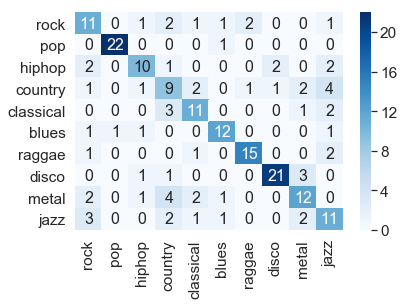

In [22]:
#LOGISTIC REGRESSION
log_reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                             class_weight=None, random_state=666, solver='liblinear', max_iter=100, multi_class='ovr', 
                             verbose=0, warm_start=False, n_jobs=None)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print('Precision: {}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {}%\n'.format(metrics.accuracy_score(y_test, y_pred) * 100))

#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
genres = ['rock', 'pop', 'hiphop', 'country', 'classical', 'blues', 'raggae', 'disco', 'metal', 'jazz']

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

print('Music Genere Classification with Logistic Regression\n')
#classification report
print(metrics.classification_report(y_test, y_pred))

Precision: 58.500%
Recall: 58.500%
Accuracy: 58.500%

Music Genere Classification with SVM

              precision    recall  f1-score   support

       blues       0.52      0.63      0.57        19
   classical       0.83      0.87      0.85        23
     country       0.38      0.47      0.42        17
       disco       0.39      0.57      0.46        21
      hiphop       0.41      0.41      0.41        17
        jazz       0.69      0.69      0.69        16
       metal       0.86      0.63      0.73        19
         pop       0.79      0.58      0.67        26
      reggae       0.73      0.50      0.59        22
        rock       0.45      0.45      0.45        20

   micro avg       0.58      0.58      0.58       200
   macro avg       0.61      0.58      0.58       200
weighted avg       0.62      0.58      0.59       200



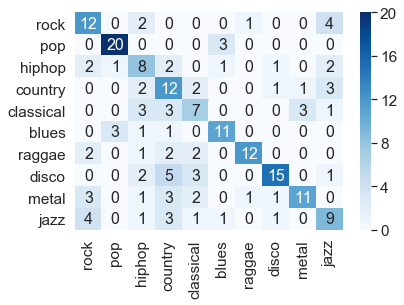

In [23]:
#SVM
C = 10 #penalty param
clf = svm.SVC(kernel='linear', C=C, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {0:.3f}%\n'.format(metrics.accuracy_score(y_test, y_pred) * 100))


#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
genres = ['rock', 'pop', 'hiphop', 'country', 'classical', 'blues', 'raggae', 'disco', 'metal', 'jazz']

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

print("Music Genere Classification with SVM\n")
#classification report
print(metrics.classification_report(y_test, y_pred))

The best number of estimators is 22

Precision: 67.500%
Recall: 67.500%
Accuracy: 67.500%
Music Genere Classification with Random Forest.

              precision    recall  f1-score   support

       blues       0.79      0.58      0.67        19
   classical       0.90      0.83      0.86        23
     country       0.75      0.53      0.62        17
       disco       0.55      0.76      0.64        21
      hiphop       0.62      0.47      0.53        17
        jazz       0.50      0.81      0.62        16
       metal       0.68      0.79      0.73        19
         pop       0.77      0.77      0.77        26
      reggae       0.65      0.68      0.67        22
        rock       0.64      0.45      0.53        20

   micro avg       0.68      0.68      0.68       200
   macro avg       0.69      0.67      0.66       200
weighted avg       0.69      0.68      0.67       200



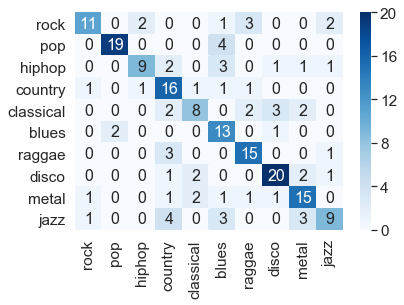

In [24]:
#RANDOM FOREST
#loop over to find the best number of estimators
results_forest=[]
for i in range(2, 100):
    forest=RandomForestClassifier(random_state=666,n_estimators=i)
    forest.fit(X_train, y_train)
    results_forest.append(forest.score(X_test, y_test))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("The best number of estimators is {}\n".format(best_n_est))

forest=RandomForestClassifier(random_state=666,n_estimators=best_n_est)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))

#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
genres = ['rock', 'pop', 'hiphop', 'country', 'classical', 'blues', 'raggae', 'disco', 'metal', 'jazz']

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

print("Music Genere Classification with Random Forest.\n")
#classification report
print(metrics.classification_report(y_test, y_pred))


In [ ]:
'''
Accuracy in these models feels somewhat imbalanced across the different models. What happens
when we decide to use a smaller number of genres rather than all of them?
'''

In [25]:
#create a smaller scope of classes - 4 instad of 10
genres = ['blues', 'metal', 'reggae', 'disco', 'pop']
X = df.loc[df['genre'].isin(genres)]
y = X['genre']
#drop the genre columns
X = X.iloc[:, 1:]

In [26]:
#training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Precision: 78.000%
Recall: 78.000%
Accuracy: 78.000%
Music Genere Classification with Logistic Regression

              precision    recall  f1-score   support

       blues       0.80      0.80      0.80        20
       disco       0.71      0.65      0.68        23
       metal       0.88      0.81      0.85        27
         pop       0.81      0.93      0.87        14
      reggae       0.67      0.75      0.71        16

   micro avg       0.78      0.78      0.78       100
   macro avg       0.77      0.79      0.78       100
weighted avg       0.78      0.78      0.78       100



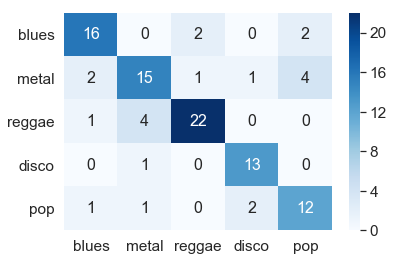

In [27]:
#LOGISTIC REGRESSION - using 4 classes
log_reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                             class_weight=None, random_state=666, solver='liblinear', max_iter=100, multi_class='ovr', 
                             verbose=0, warm_start=False, n_jobs=None)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))
log_reg.score(X_train, y_train)
#print('Predicted values:\n {}'.format(y_pred))

#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

print('Music Genere Classification with Logistic Regression\n')
#classification report
print(metrics.classification_report(y_test, y_pred))

Precision: 75.000%
Recall: 75.000%
Accuracy: 75.000%
Music Genere Classification with SVM

              precision    recall  f1-score   support

       blues       0.76      0.94      0.84        17
       disco       0.52      0.83      0.64        18
       metal       0.95      0.83      0.88        23
         pop       0.82      0.60      0.69        15
      reggae       0.84      0.59      0.70        27

   micro avg       0.75      0.75      0.75       100
   macro avg       0.78      0.76      0.75       100
weighted avg       0.79      0.75      0.75       100



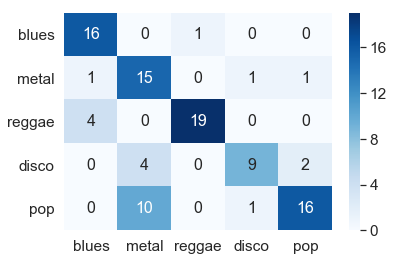

In [17]:
#SVM - using 4 classes
C = 10 #regularization param
clf = svm.SVC(kernel='linear', C=C, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))
#print('Predicted values:\n {}'.format(y_pred))
#mean accuracy
clf.score(X_train, y_train)


#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

print("Music Genere Classification with SVM\n")
#classification report
print(metrics.classification_report(y_test, y_pred))

The best number of estimators is 40
Precision: 87.000%
Recall: 87.000%
Accuracy: 87.000%
Music Genere Classification with Random Forest.

              precision    recall  f1-score   support

       blues       0.90      0.95      0.93        20
       disco       0.80      0.87      0.83        23
       metal       0.92      0.85      0.88        27
         pop       0.87      0.93      0.90        14
      reggae       0.86      0.75      0.80        16

   micro avg       0.87      0.87      0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



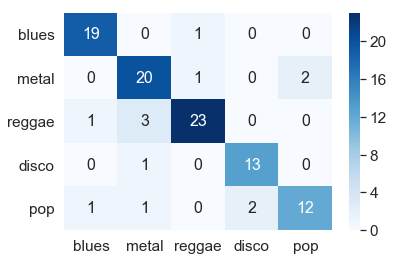

In [28]:
#RANDOM FOREST
#loop over to find the best number of estimators
results_forest=[]
for i in range(2, 100):
    forest=RandomForestClassifier(random_state=666,n_estimators=i)
    forest.fit(X_train, y_train)
    results_forest.append(forest.score(X_test, y_test))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("The best number of estimators is {}".format(best_n_est))

forest=RandomForestClassifier(random_state=666,n_estimators=best_n_est)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))

#mean accuracy
forest.score(X_train, y_train)

#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

print("Music Genere Classification with Random Forest.\n")
#classification report
print(metrics.classification_report(y_test, y_pred))